In [2]:
from os.path import join, sep
from scipy.spatial.distance import squareform
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

MODEL = '2.02'

tf_idf_path = join('C:', sep, 'Users', 'ssarusi', 'Desktop', 'second_degree', 'semester_d', 'NLP', 'tf_idf', MODEL)
scores_path = join('C:', sep, 'Users', 'ssarusi', 'Desktop', 'second_degree', 'semester_d', 'NLP', 'scores', MODEL)
dis_path = join('C:', sep, 'Users', 'ssarusi', 'Desktop', 'second_degree', 'semester_d', 'NLP', 'distances', MODEL)
fig_path = join('C:', sep, 'Users', 'ssarusi', 'Desktop', 'second_degree', 'semester_d', 'NLP', 'figures', MODEL)

In [3]:
def load_dis_matrices(n_m1, n_m2, method, d_path):
    name_1 = n_m1 + '_' + method + '_' + n_m2
    name_2 = n_m2 + '_' + method + '_' + n_m1
    print(f"load {name_1}")
    with open(join(d_path, name_1 + '.pickle'), 'rb') as handle:
        dis_1 = pickle.load(handle)
    print(f"load {name_2}")
    with open(join(d_path, name_2 + '.pickle'), 'rb') as handle:
        dis_2 = pickle.load(handle)
    #dis_1= dis_1[:120]
    #dis_2= dis_2[:120] 
    return squareform(dis_1), squareform(dis_2)

In [ ]:
def generate_heatmaps(n_m1, n_m2, method, d_path, f_path):
    DPI = 100
    
    dis_1, dis_2 = load_dis_matrices(n_m1, n_m2, method, d_path)
    print(type(dis_1))

    title = "Distances between " + method + " words"
    dis = [dis_1, dis_2]
    t1 = n_m1.replace(r"_model_.*","")
    t2 = n_m2.replace("_model_2.01.model","")
    community = [t1, t2]

    cols=2
    fig ,ax = plt.subplots(ncols=cols, figsize=(24, 12))
    fig.suptitle(title, fontsize=30)
    for j in range(cols):   
        ax[j].set_title(community[j], fontsize=30)
        ax[j].tick_params(left=False, bottom=False)
        mask = np.zeros_like(dis[j])
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(dis[j], mask=mask, annot=False, cmap="Blues", square=True, ax=ax[j], vmin=-1, vmax=1)
    fig.savefig(join(f_path, t1 + t2 + '_' + method + '.png'), bbox_inches="tight", dpi=DPI)
    plt.show()

load amateurxxx_model_2.01.model_union_appnana_codes_model_2.01.model
load appnana_codes_model_2.01.model_union_amateurxxx_model_2.01.model
<class 'numpy.ndarray'>


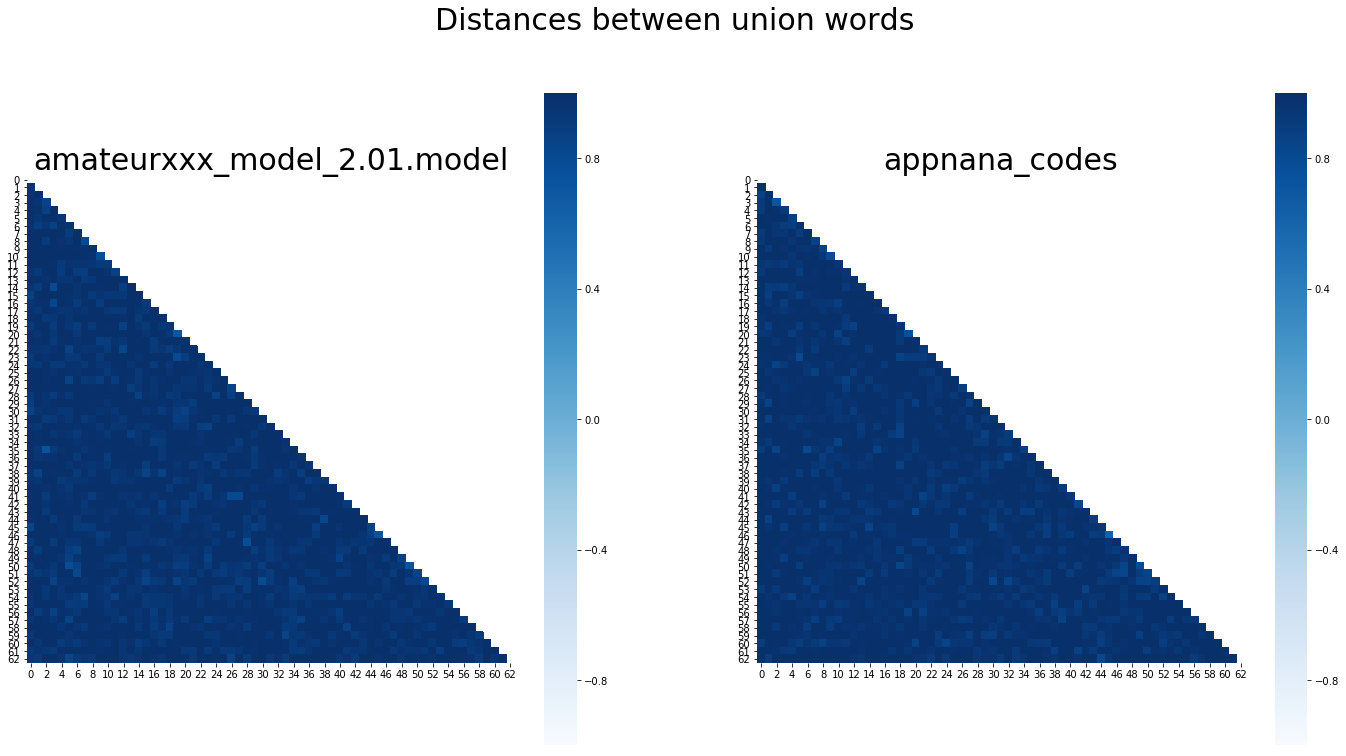

In [59]:
method_='union'
# method_='intersection'
generate_heatmaps('amateurxxx_model_2.01.model', 'appnana_codes_model_2.01.model', method_, dis_path, fig_path, )

In [ ]:
method_='union'
# method_='intersection'
generate_heatmaps('apple_model_2.01.model', 'android_model_2.01.model', method_, dis_path, fig_path)

load apple_model_2.01.model_union_android_model_2.01.model
load android_model_2.01.model_union_apple_model_2.01.model
